# Chicago Bird Diversity

### Instructions
- **Do not run the Section 2 because the initial dataset might not be available at your end.Refrain from running even if it's available as it takes a lot of time**.
- Run the imports cell before Section 2. Start running from Section 3. Before that, download the dataset from google drive [link](https://drive.google.com/file/d/1hmlXERz6M9B25s_ogpSJU86cXNG-jW2v/view?usp=sharing) and save it in the **data** folder.

## Section 1. Project Introduction
This project explores the relationship between socio-economic indicators and bird diversity in Chicago communities. Utilizing a dataset containing metrics such as housing conditions, poverty rates, and per capita income alongside bird diversity measures, we aim to investigate whether affluent neighborhoods exhibit higher bird diversity.

In [31]:
import eda, ml, pandas as pd, numpy as np, geopandas as gpd, warnings, textwrap; warnings.filterwarnings("ignore")

## Section 2. Data Cleaning

### 2.1 Read and Filter eBird Dataset

In [ ]:
# Filter colum
# dataset_files = ['xaa','xab','xac','xad','xae','xaf','xag','xah','xai','xaj','xak','xal','xam','xan','xao','xap','xaq','xar','xas','xat','xau','xav','xaw','xax','xay','xaz','xba','xbb','xbc']
# cook_county_df = pd.DataFrame()
# for file in dataset_files:
#     df = pd.read_csv('data/{file}'.format(file=file),sep='\t')
#     df = df[df["COUNTY"].str.lower() == "cook"]
#     cook_county_df = pd.concat([cook_county_df,df])
# cook_county_df.to_csv('data/ebd_cook_county.tsv', index=False,sep='\t')
cook_county_df = pd.read_csv('data/ebd_cook_county.tsv',sep='\t')

In [ ]:
df = cook_county_df
req_cols = ['CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'EXOTIC CODE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE', 'PROTOCOL TYPE', 'ALL SPECIES REPORTED']
df = df[req_cols]

We will keep only species level observations (removing subspecies and genus level observations). We will also filter out incomplete checklists and incidental observations to manage bias towards specific species.

In [ ]:
df = df[(df['CATEGORY']=='species') & (df['PROTOCOL TYPE']=='Traveling') | (df['PROTOCOL TYPE']=='Stationary') & (df['ALL SPECIES REPORTED']==1)]

### 2.2 ebird Dataset Transformation

In [ ]:
df['NATIVE'] = df['EXOTIC CODE'].apply(lambda row:0 if row == np.nan else 1) # Native column: 1 = is native to chicago, 0 = not native to chicago
df['COUNT'] = df['OBSERVATION COUNT'].apply(lambda row: 1 if row == 'X' else row) # Assume all 'X' observations have a count of 1 bird
req_cols = ['COMMON NAME', 'SCIENTIFIC NAME', 'NATIVE', 'COUNT', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE']
df = df[req_cols] # remove unnecessary columns

### 2.3 Aggregate eBird data based on neighborhood

In [ ]:
com_areas = gpd.read_file('data/neighborhoods/geo_export_f5325bf0-9c6d-49a5-a5d9-0e5bf24fa856.shp')
ebird_gdf = eda.join_datasets(df,com_areas)

### 2.4 Transform and Save the final dataset

In [ ]:
ebird_gdf = eda.modify_ebird_dataset(ebird_gdf)
ebird_gdf.to_csv("data/final_dataset.tsv",index=False,sep='\t')

## Section 3: EDA

- **Final Dataset**
    - The granularity of the final dataset is eBird data of Chicago starting from the year 1948 to 2024.

In [32]:
ebird_gdf = pd.read_csv('data/final_dataset.tsv',sep='\t')

In [33]:
ebird_gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902730 entries, 0 to 3902729
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   COMMON NAME        object
 1   SCIENTIFIC NAME    object
 2   NATIVE             int64 
 3   COUNT              int64 
 4   OBSERVATION DATE   object
 5   geometry           object
 6   community          object
 7   OBSERVATION MONTH  int64 
 8   OBSERVATION DAY    int64 
 9   OBSERVATION YEAR   int64 
dtypes: int64(5), object(5)
memory usage: 297.8+ MB


In [34]:
ebird_gdf.head(5)

,COMMON NAME,SCIENTIFIC NAME,NATIVE,COUNT,OBSERVATION DATE,geometry,community,OBSERVATION MONTH,OBSERVATION DAY,OBSERVATION YEAR
0,American Crow,Corvus brachyrhynchos,1,1,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
1,American Goldfinch,Spinus tristis,1,4,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
2,American Redstart,Setophaga ruticilla,1,3,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
3,American Robin,Turdus migratorius,1,1,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
4,Black-and-white Warbler,Mniotilta varia,1,5,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948


In [35]:
from importlib import reload
reload(eda)

<module 'eda' from '/home/happy/repos/group-project-the-data-sleuths/eda.py'>

In [36]:
ebird_gdf = ebird_gdf[(ebird_gdf["OBSERVATION YEAR"] >= 2014) & (ebird_gdf["OBSERVATION YEAR"] <= 2023)]

In [37]:
#for col in ["COMMON NAME","community","OBSERVATION YEAR","OBSERVATION MONTH"]:
col = "OBSERVATION MONTH"
distribution = eda.distribution(ebird_gdf,col)

OBSERVATION MONTH distribution

    OBSERVATION MONTH     Size    Percent
4                   5  1031049  31.283753
3                   4   458077  13.898823
8                   9   333924  10.131813
9                  10   281149   8.530531
7                   8   201139   6.102894
5                   6   200810   6.092912
2                   3   192285   5.834249
6                   7   157126   4.767466
10                 11   144656   4.389105
0                   1   102838   3.120277
11                 12    99956   3.032832
1                   2    92788   2.815343





### 3.1 Insights from Datasets

- **Ring-billed Gull** and **European Starling** are the most commonly seen birds in Chicago .
- Approximately **60%** of bird observations are concentrated in only **five** communities, with **uptown** accounting for nearly 27% of these observations.
- **April** and **May** have higher bird observations due to breeding and migration patterns in the summer.

### 3.2 Monthly distribution of bird observations between 2014 and 2023

In [38]:
import matplotlib.pyplot as plt, matplotlib.patches as mpatches, seaborn as sns, plotly.express as px, altair as alt

In [39]:
viz_df = distribution
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
viz_df['Month'] = viz_df['OBSERVATION MONTH'].map(month_map)
px.bar(viz_df.sort_values(by="OBSERVATION MONTH"), x="Month", y="Percent", 
       title="Monthly distribution of bird observations between 2014 and 2023", labels={"Percent": "Percentage"}, hover_data={"Month": True}, color_discrete_sequence=["#636EFA"]).update_layout(xaxis_tickangle=0, 
       xaxis=dict(type='category')).update_traces(marker_line_width=0).show()

## Section 4: Vizualizations


## 4.1 (_Did the bird diversity in Chicago increase over the last 10 years?_)

(_The graph depicts bird diversity across Chicago's communities, revealing a correlation between higher per capita income and increased bird diversity, while also highlighting the fluctuating levels of diversity within low-income neighborhoods._)

In [40]:
viz_df = eda.aggregate_data(ebird_gdf,["OBSERVATION YEAR"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)

In [41]:
#viz_df = viz_df[(viz_df["OBSERVATION YEAR"] >= 2019) & (viz_df["OBSERVATION YEAR"] <= 2023)] 
fig = px.line(viz_df.sort_values(by="OBSERVATION YEAR"), x='OBSERVATION YEAR', y='shannon_index',
             title='Bird Diversity Trend: Dip in 2023',
             labels={'OBSERVATION YEAR': 'Year', 'shannon_index': 'Shannon Index(Bird Diversity)'},markers=True)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()


## 4.2 (_Which communities have higher bird diversity?_)

(_The graph depicts bird diversity across Chicago's communities_)

In [42]:
# Plotting
com_areas = gpd.read_file('data/neighborhoods/geo_export_f5325bf0-9c6d-49a5-a5d9-0e5bf24fa856.shp')
df_2023 = ebird_gdf[ebird_gdf["OBSERVATION YEAR"] == 2023]
viz_df = eda.aggregate_data(df_2023,["community"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)
viz_df = viz_df[["community","shannon_index"]]
gdf = com_areas.merge(viz_df, on='community')
gdf

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,shannon_index
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",5.361098
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",4.967598
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",1.139535
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",2.854021
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",3.965779
...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",2.628951
71,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",5.043987
72,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",6.451066
73,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",6.652118


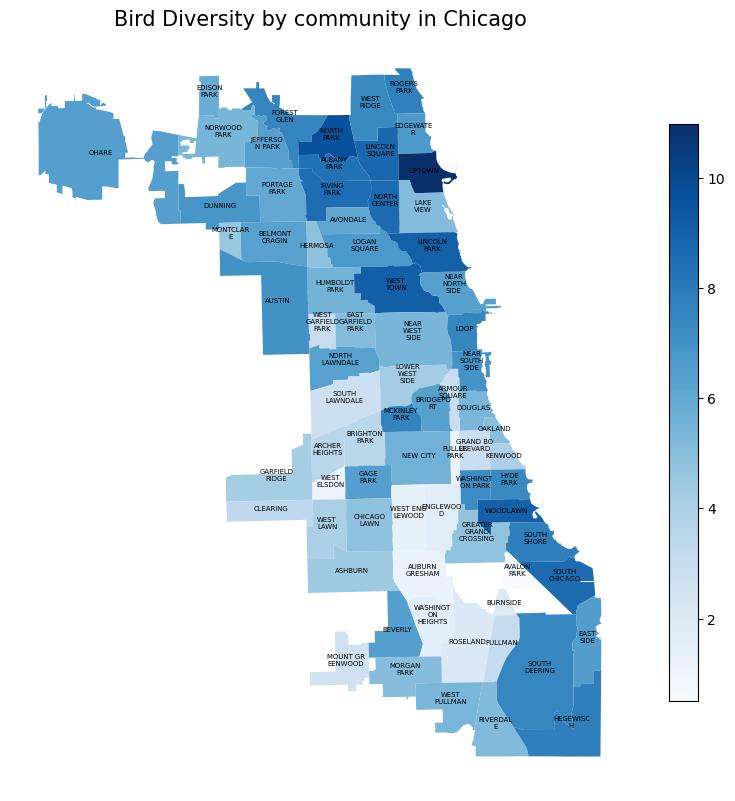

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='shannon_index', cmap='Blues', linewidth=0.8, ax=ax,legend=True,legend_kwds={'shrink': 0.75})
for idx, row in gdf.iterrows():
    wrapped_text = textwrap.fill(row['community'], width=8)
    plt.annotate(text=wrapped_text, xy=row.geometry.centroid.coords[0], ha='center', fontsize=5)
ax.set_title('Bird Diversity by community in Chicago', fontdict={'fontsize': '15', 'fontweight' : '3'})
# Remove axis
ax.set_axis_off()
plt.show()

In [44]:
community_df = eda.aggregate_data(ebird_gdf,["OBSERVATION YEAR","community"])
community_df["shannon_index"] = community_df["COUNT"].apply(eda.shannon_index)

In [45]:
print(set(community_df["community"].tolist()))

{'OAKLAND', 'UPTOWN', 'BURNSIDE', 'MOUNT GREENWOOD', 'MONTCLARE', 'EAST GARFIELD PARK', 'CALUMET HEIGHTS', 'AUSTIN', 'EAST SIDE', 'MORGAN PARK', 'NEAR WEST SIDE', 'LINCOLN SQUARE', 'CLEARING', 'GREATER GRAND CROSSING', 'HERMOSA', 'HYDE PARK', 'JEFFERSON PARK', 'BEVERLY', 'ROGERS PARK', 'NORTH PARK', 'AVALON PARK', 'LOOP', 'HUMBOLDT PARK', 'CHATHAM', 'NORTH LAWNDALE', 'MCKINLEY PARK', 'WEST PULLMAN', 'EDGEWATER', 'GRAND BOULEVARD', 'BRIGHTON PARK', 'PULLMAN', 'WEST TOWN', 'BELMONT CRAGIN', 'KENWOOD', 'GAGE PARK', 'NORTH CENTER', 'WASHINGTON HEIGHTS', 'ALBANY PARK', 'LAKE VIEW', 'LOWER WEST SIDE', 'NEAR SOUTH SIDE', 'CHICAGO LAWN', 'WEST RIDGE', 'ARMOUR SQUARE', 'PORTAGE PARK', 'NEW CITY', 'NORWOOD PARK', 'ROSELAND', 'LINCOLN PARK', 'SOUTH SHORE', 'SOUTH LAWNDALE', 'WEST GARFIELD PARK', 'ARCHER HEIGHTS', 'IRVING PARK', 'ENGLEWOOD', 'WEST LAWN', 'FULLER PARK', 'WOODLAWN', 'SOUTH DEERING', 'AVONDALE', 'NEAR NORTH SIDE', 'HEGEWISCH', 'WASHINGTON PARK', 'ASHBURN', 'FOREST GLEN', 'LOGAN SQUAR

In [46]:
import pandas as pd

# 既存のcommunity_dfデータフレームを使用して、各コミュニティのShannon Indexの最大値と最小値の差を計算
community_range = community_df.groupby('community')['shannon_index'].agg(
    shannon_range=lambda x: x.max() - x.min()
).reset_index()

# 結果を表示
print(community_range)

         community  shannon_range
0      ALBANY PARK       3.376852
1   ARCHER HEIGHTS       2.106816
2    ARMOUR SQUARE       3.264571
3          ASHBURN       4.405790
4   AUBURN GRESHAM       2.459712
..             ...            ...
72       WEST LAWN       1.893128
73    WEST PULLMAN       1.495573
74      WEST RIDGE       4.461402
75       WEST TOWN       3.476964
76        WOODLAWN       1.170184

[77 rows x 2 columns]


In [47]:
import pandas as pd

# 既存のcommunity_dfデータフレームを使用して、各コミュニティのShannon Indexの最大値と最小値の差を計算
community_range = community_df.groupby('community')['shannon_index'].agg(
    shannon_range=lambda x: x.max() - x.min()
).reset_index()

# 最大値から最小値を引いた数値が大きいデータのトップ5を表示
top_5_largest_ranges = community_range.nlargest(5, 'shannon_range')
print("Top 5 Largest Shannon Index Ranges:")
print(top_5_largest_ranges)

# 最大値から最小値を引いた数値が小さいデータのトップ5を表示
top_5_smallest_ranges = community_range.nsmallest(5, 'shannon_range')
print("Top 5 Smallest Shannon Index Ranges:")
print(top_5_smallest_ranges)


Top 5 Largest Shannon Index Ranges:
          community  shannon_range
57     PORTAGE PARK       6.656461
18          DUNNING       5.296214
64   SOUTH LAWNDALE       5.185979
68  WASHINGTON PARK       4.815523
7          AVONDALE       4.778827
Top 5 Smallest Shannon Index Ranges:
         community  shannon_range
12        BURNSIDE       0.000000
14         CHATHAM       0.518101
38    LINCOLN PARK       0.548543
8   BELMONT CRAGIN       0.812661
5           AUSTIN       0.844418


In [48]:
community = "PORTAGE PARK"
viz_df = community_df[community_df["community"] == community]

In [49]:
fig = px.line(viz_df.sort_values(by="OBSERVATION YEAR"), x='OBSERVATION YEAR', y='shannon_index',
             title='Bird Diversity Trend of {}: Dip in 2021'.format(community),
             labels={'OBSERVATION YEAR': 'Year', 'shannon_index': 'Shannon Index(Bird Diversity)'},markers=True)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=0))
fig.show()

### 4.3 Diversity by Season

In [50]:
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

ebird_gdf['Season'] = ebird_gdf['OBSERVATION MONTH'].apply(categorize_season)
viz_df = eda.aggregate_data(ebird_gdf,["Season","OBSERVATION YEAR"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)

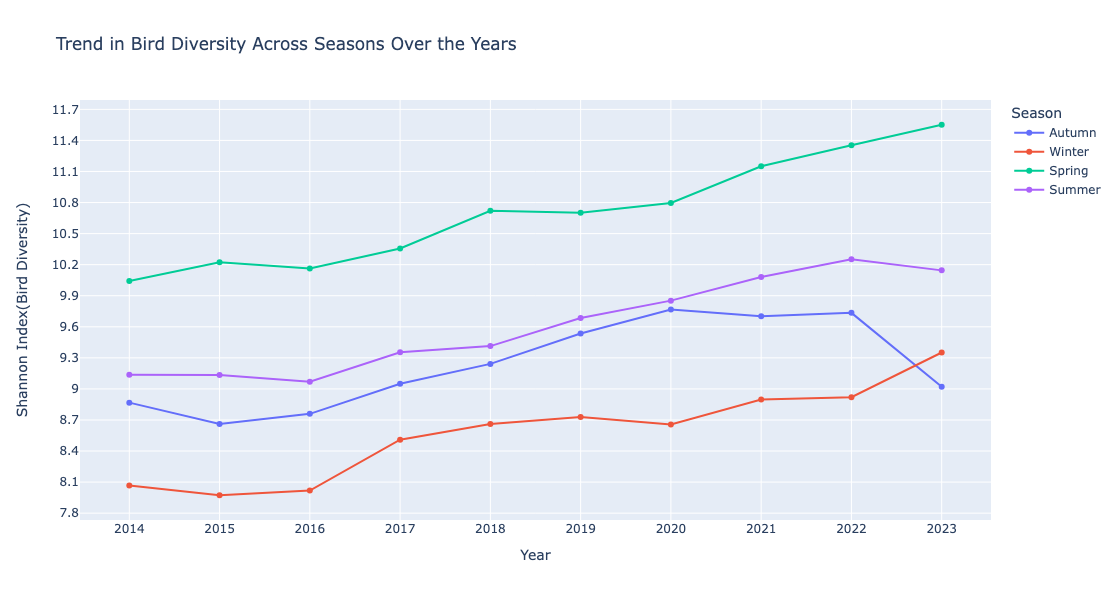

In [51]:
fig = px.line(viz_df.sort_values(by="OBSERVATION YEAR"), x='OBSERVATION YEAR', y='shannon_index', color='Season',
             title='Trend in Bird Diversity Across Seasons Over the Years',
             labels={'OBSERVATION YEAR': 'Year', 'shannon_index': 'Shannon Index(Bird Diversity)'},markers=True, height = 600)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(yaxis=dict(tickmode='linear', dtick=0.3))
fig.show()

### 4.4 Diversity by Location

In [52]:
import plotly.express as px

fig = px.violin(viz_df, x='Season', y='shannon_index', color='Season',
                title='Distribution of Bird Diversity Across Seasons',
                labels={'Season': 'Season', 'shannon_index': 'Shannon Index (Bird Diversity)'},
                height=600)

# Update layout to force tooltips on the right
fig.update_layout(hovermode='x')

fig.show()

### 4.4 Diversity by Location

In [53]:
community_location_map = {
    'LAKE VIEW': 'North',
    'IRVING PARK': 'West',
    'GREATER GRAND CROSSING': 'South',
    'AVALON PARK': 'South',
    'LOGAN SQUARE': 'North',
    'NORWOOD PARK': 'North',
    'DUNNING': 'West',
    'ENGLEWOOD': 'South',
    'EDISON PARK': 'North',
    'WEST LAWN': 'South',
    'NEAR SOUTH SIDE': 'South',
    'FOREST GLEN': 'North',
    'SOUTH DEERING': 'South',
    'JEFFERSON PARK': 'North',
    'WEST ENGLEWOOD': 'South',
    'CHATHAM': 'South',
    'SOUTH CHICAGO': 'South',
    'FULLER PARK': 'South',
    'PULLMAN': 'South',
    'NORTH CENTER': 'North',
    'WEST GARFIELD PARK': 'West',
    'EAST SIDE': 'South',
    'PORTAGE PARK': 'North',
    'NORTH LAWNDALE': 'West',
    'CALUMET HEIGHTS': 'South',
    'LOWER WEST SIDE': 'South',
    'WEST RIDGE': 'North',
    'HUMBOLDT PARK': 'West',
    'MCKINLEY PARK': 'West',
    'MOUNT GREENWOOD': 'South',
    'BRIDGEPORT': 'South',
    'ALBANY PARK': 'North',
    'WEST ELSDON': 'South',
    'EDGEWATER': 'North',
    'NEAR WEST SIDE': 'West',
    'AUBURN GRESHAM': 'South',
    'BRIGHTON PARK': 'South',
    'UPTOWN': 'North',
    'WEST PULLMAN': 'South',
    'WEST TOWN': 'West',
    'NEAR NORTH SIDE': 'North',
    'WASHINGTON PARK': 'South',
    'CLEARING': 'South',
    'MONTCLARE': 'West',
    'NEW CITY': 'South',
    'BURNSIDE': 'South',
    'SOUTH LAWNDALE': 'South',
    'HERMOSA': 'West',
    'ROGERS PARK': 'North',
    'ASHBURN': 'South',
    'BEVERLY': 'South',
    'ARMOUR SQUARE': 'South',
    'EAST GARFIELD PARK': 'West',
    'CHICAGO LAWN': 'South',
    'BELMONT CRAGIN': 'West',
    'ROSELAND': 'South',
    'LINCOLN SQUARE': 'North',
    'OAKLAND': 'South',
    'LOOP': 'East',
    'MORGAN PARK': 'South',
    'HYDE PARK': 'South',
    'GARFIELD RIDGE': 'South',
    'AVONDALE': 'North',
    'NORTH PARK': 'North',
    'ARCHER HEIGHTS': 'South',
    'WOODLAWN': 'South',
    'OHARE': 'West',
    'SOUTH SHORE': 'South',
    'LINCOLN PARK': 'North',
    'WASHINGTON HEIGHTS': 'South',
    'HEGEWISCH': 'South',
    'GRAND BOULEVARD': 'South',
    'GAGE PARK': 'South',
    'DOUGLAS': 'South',
    'KENWOOD': 'East',
    'RIVERDALE': 'South',
    'AUSTIN': 'West'
}

ebird_gdf['Location'] = ebird_gdf['community'].map(community_location_map)
viz_df = eda.aggregate_data(ebird_gdf,["Location","OBSERVATION YEAR"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)


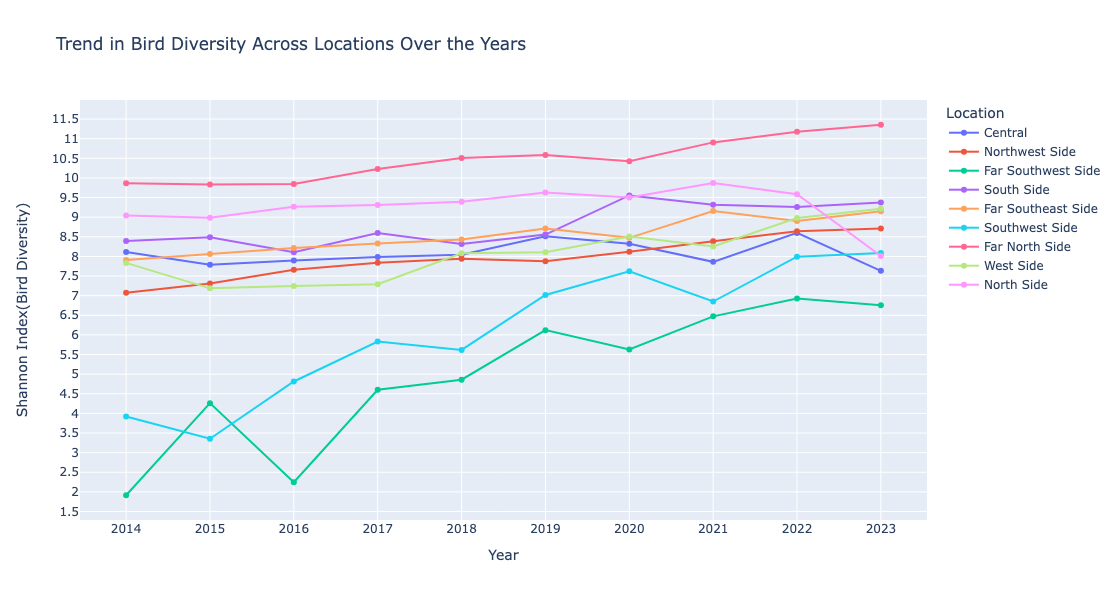

In [54]:
fig = px.line(viz_df.sort_values(by="OBSERVATION YEAR"), x='OBSERVATION YEAR', y='shannon_index', color='Location',
             title='Trend in Bird Diversity Across Locations Over the Years',
             labels={'OBSERVATION YEAR': 'Year', 'shannon_index': 'Shannon Index(Bird Diversity)'},markers=True, height = 600)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(yaxis=dict(tickmode='linear', dtick=0.5))
fig.show()

In [55]:
print(viz_df.head(15))

   Location  OBSERVATION YEAR  \
0      East              2014   
1      East              2015   
2      East              2016   
3      East              2017   
4      East              2018   
5      East              2019   
6      East              2020   
7      East              2021   
8      East              2022   
9      East              2023   
10    North              2014   
11    North              2015   
12    North              2016   
13    North              2017   
14    North              2018   

                                          COMMON NAME  \
0   [American Crow, American Crow, American Crow, ...   
1   [American Crow, American Crow, American Crow, ...   
2   [American Crow, American Crow, American Crow, ...   
3   [American Crow, American Crow, American Crow, ...   
4   [American Crow, American Crow, American Crow, ...   
5   [American Crow, American Crow, American Crow, ...   
6   [American Crow, American Crow, American Crow, ...   
7   [American C

## Section 5: Machine Learning Analysis

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [57]:
final_df[["OBSERVATION MONTH","OBSERVATION YEAR","community","shannon_index"]]

KeyError: "None of [Index(['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',\n       'HARDSHIP INDEX', 'PER CAPITA INCOME'],\n      dtype='object')] are in the [columns]"

In [45]:
community_counts = final_df['community'].value_counts()
communities_to_remove = community_counts[community_counts == 1].index.tolist()
final_df = final_df[~final_df['community'].isin(communities_to_remove)]

In [61]:
features = ['OBSERVATION MONTH', 
            'OBSERVATION YEAR', 
            'community']
target = 'shannon_index'
X = final_df[features]
y = final_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['community'])
    ],
    remainder='passthrough'
)

### 5.1 Baseline

- The baseline model uses mean of the target data for fitting the data

In [62]:
print("Mean Squared Error (Baseline - Mean Prediction): {}".format(ml.baseline(y_train,y_test)))

Mean Squared Error (Baseline - Mean Prediction): 3.3197248952918437


### 5.2 Decision Tree Regressor vs Baseline
- Decision Tree Regressor's MSE of 13.741 indicates substantial prediction errors.Baseline MSE of 6.226 shows the model's performance is worse than a simple mean predictor.Possible overfitting is suggested by the high MSE of the baseline model, might need for model refinement.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [64]:

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.1088220695925526


### 5.3 Random forest regressor vs baseline
- Random Forest leverages ensemble learning, combining multiple decision trees for improved accuracy.It captures non-linear relationships in data, unlike the Baseline, which predicts a constant mean.Random Forest automatically assesses feature importance, focusing on relevant predictors, reducing prediction errors.

In [65]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100,random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.8935149598423835


In [66]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler is often used with SVR
    ('model', SVR())
])
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.8150769502112771


## Section 6: Reflection
### What is hardest part of the project that you’ve encountered so far?
 Identifying community of a bird observation using the bird coordinates and the community boundaries.Obtaining the correct geographical dataset of Illinois counties with exact coordinates.  
 
### What are your initial insights?
 Rich communities definitely have the higher bird diversity but the vice versa is not exactly true.